In [1]:
#since noteboke doesn't work in jupiterlabs    %matplotlib notebook 
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('/home/dana_z/ssd_2TB/6OHDA')
#import mpld3
#mpld3.enable_notebook()
import numpy as np
import scipy as sci
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as Mcolors
import matplotlib.cm as cmx
import sys
import h5py
from IO import *
from utils import *
from plotUtils import *
from ColorSchems import colorPallet as CP
import pptx
from pptx import Presentation 
from pptx.util import Inches
from io import BytesIO
import re
import warnings
import pandas as pd
import sqlalchemy as db
import gc
from tqdm import tqdm
import seaborn as sns
import pywt # wavelet package

In [3]:
Files = ['FinalData_6OHDA.h5','FinalData_6OHDA_H.h5','FinalData_6OHDA_H_skip.h5','FinalData_6OHDA_skip.h5']

<h1> Movement figures </h1>

In [4]:
# create containers for data:
speedData = []

miceList = getMiceList(Files[0])
for m in miceList:
    data = getData(Files[0],['speed'],period ='Pre', mice=m)
    
    # calculte % high speed + % low speed
    for sess in data:
        # find the day of the session
        if sess[5] == 'B':
            day = 0
        else:
            day = int(re.findall(r'\d+',sess[5:])[0])
        
        row = {'Mouse':m,'Session':sess,'Day':day}
        Hp = getOnsetOrPeriod(m,sess,'Pre','HighMvmtPeriods_vector')
        Lp = getOnsetOrPeriod(m,sess,'Pre','LowMvmtPeriods_vector')
        comb = Hp*1+((Lp*1)-1)*-1
                
        row['percent_low'] = np.sum(Lp*1)/len(Lp)
        row['percent_high'] = np.sum(Hp*1)/len(Hp)
        row['percent_medium'] = np.sum(comb==1)/len(comb)
        
        trans = comb[1:]-comb[:-1]
        
        row['tran_all'] = np.sum(np.abs(trans!=0))
        row['tran_low2any'] = np.sum(np.abs(Lp[1:]*1-Lp[:-1]*1))
        row['tran_high2any'] = np.sum(np.abs(Hp[1:]*1-Hp[:-1]*1))
        
        speedData.append(row)
        
     
df = pd.DataFrame(speedData)        


cleaning up speed data
cleaning up speed data
cleaning up speed data
cleaning up speed data
cleaning up speed data
cleaning up speed data
cleaning up speed data
cleaning up speed data
cleaning up speed data
cleaning up speed data
cleaning up speed data
cleaning up speed data
cleaning up speed data
cleaning up speed data
cleaning up speed data
cleaning up speed data


In [5]:
def periodCalc(day):
    if day== 0:
        return 'Healthy'
    elif day<5:
        return 'Day 1-4'
    elif day<13:
        return 'Day 5-12'
    elif day<21:
        return 'Two weeks'
    else:
        return 'One Month'
df['Period'] =  df.apply (lambda row: periodCalc(row.Day) , axis=1)

In [7]:
betaMice = ['8430','4539','7584','7909','1222']
df['Beta'] =  df.apply (lambda row: row.Mouse in betaMice , axis=1)

<IPython.core.display.Javascript object>


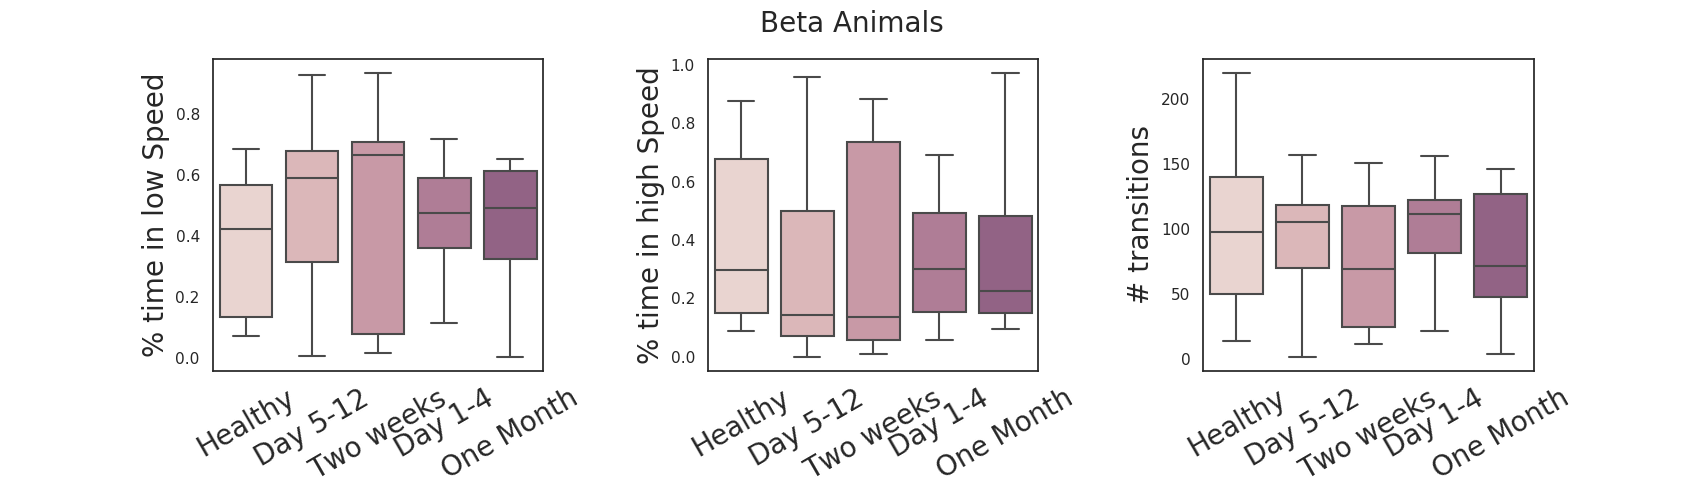

<IPython.core.display.Javascript object>


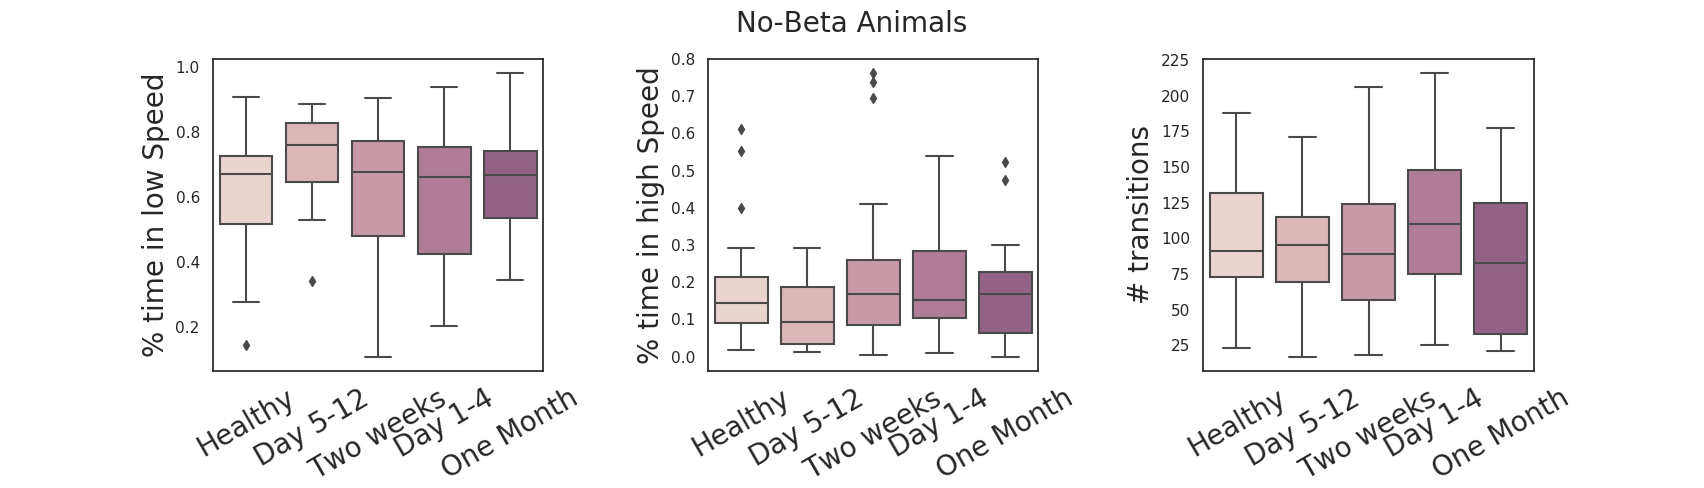

In [13]:
sns.set(color_codes=True)
sns.set_style("white")
fig, ax = plt.subplots(1,3,figsize=(17.04,4.88),gridspec_kw = {'hspace':.1,'wspace':.5,'bottom':0.24})
fig2, ax2 = plt.subplots(1,3,figsize=(17.04,4.88),gridspec_kw = {'hspace':.1,'wspace':.5,'bottom':0.24})
columns = ['percent_low','percent_high','tran_low2any'] 
labels = ['% time in low Speed','% time in high Speed','# transitions']
for ind in range(len(columns)):
    sns.boxplot(x="Period", y=columns[ind], data=df[df.Beta==True],ax =ax[ind],palette=sns.cubehelix_palette(8))
    ax[ind].set_xticklabels(ax[ind].get_xticklabels(),rotation=30,fontsize=20)
    ax[ind].set_ylabel(labels[ind],fontsize=20)
    ax[ind].set_xlabel("")
    sns.boxplot(x="Period", y=columns[ind], data=df[df.Beta==False],ax =ax2[ind],palette=sns.cubehelix_palette(8))
    ax2[ind].set_xticklabels(ax[ind].get_xticklabels(),rotation=30,fontsize=20)
    ax2[ind].set_ylabel(labels[ind],fontsize=20)
    ax2[ind].set_xlabel("")

fig.suptitle('Beta Animals', fontsize=20)
fig2.suptitle('No-Beta Animals', fontsize=20)
fig.savefig('figs/labMeetingNov/Beta_mvmt_boxplot2.png',transparent=True,format='png')
fig2.savefig('figs/labMeetingNov/nBeta_mvmt_boxplot2.png',transparent=True,format='png')
#fig.savefig('figs/labMeetingNov/mvmt_boxplot2.svg',transparent=True,format='svg')

<IPython.core.display.Javascript object>


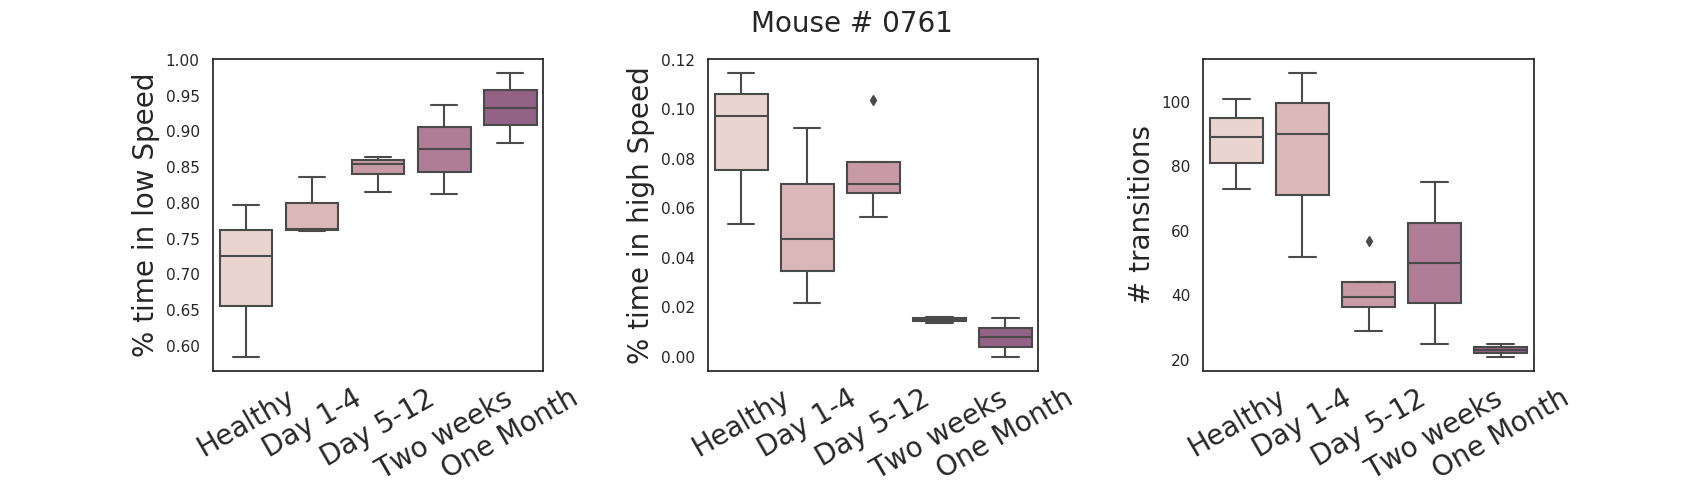

<IPython.core.display.Javascript object>


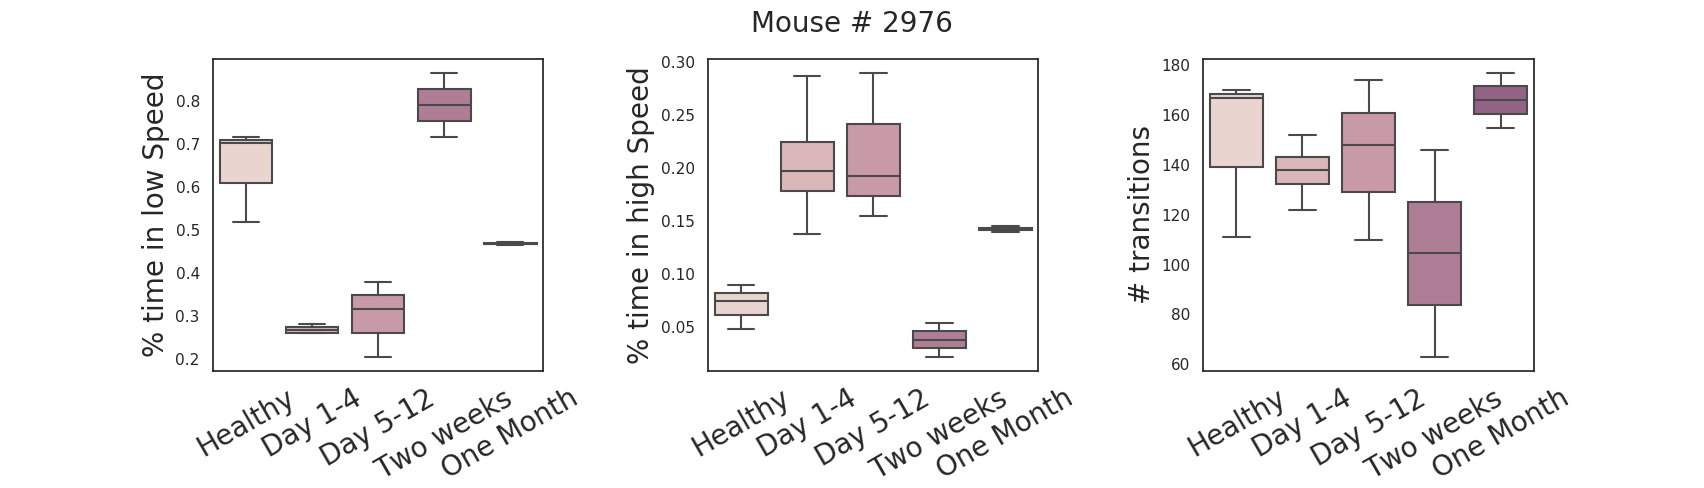

<IPython.core.display.Javascript object>


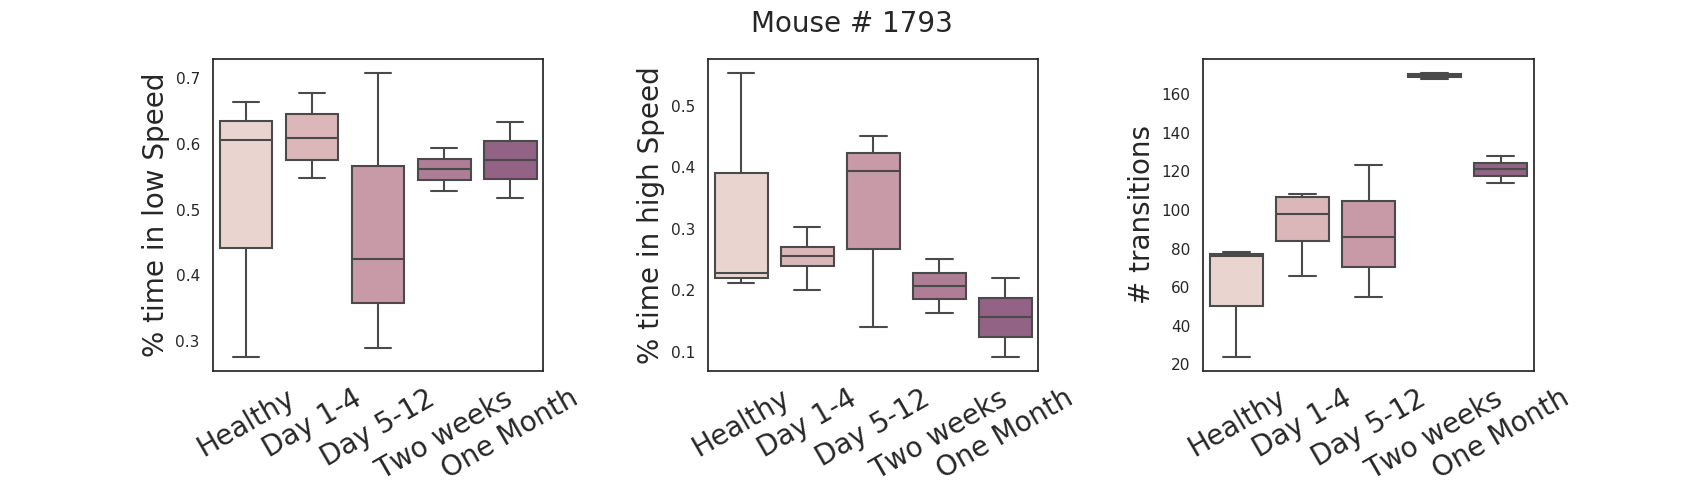

In [33]:
sns.set(color_codes=True)
sns.set_style("white")
fig, ax = plt.subplots(1,3,figsize=(17.04,4.88),gridspec_kw = {'hspace':.1,'wspace':.5,'bottom':0.24})
fig2, ax2 = plt.subplots(1,3,figsize=(17.04,4.88),gridspec_kw = {'hspace':.1,'wspace':.5,'bottom':0.24})
fig3, ax3 = plt.subplots(1,3,figsize=(17.04,4.88),gridspec_kw = {'hspace':.1,'wspace':.5,'bottom':0.24})
columns = ['percent_low','percent_high','tran_low2any'] 
labels = ['% time in low Speed','% time in high Speed','# transitions']
for ind in range(len(columns)):
    sns.boxplot(x="Period", y=columns[ind], data=df[df.Mouse=='0761'],ax =ax[ind],palette=sns.cubehelix_palette(8))
    ax[ind].set_xticklabels(ax[ind].get_xticklabels(),rotation=30,fontsize=20)
    ax[ind].set_ylabel(labels[ind],fontsize=20)
    ax[ind].set_xlabel("")
    sns.boxplot(x="Period", y=columns[ind], data=df[df.Mouse=='2976'],ax =ax2[ind],palette=sns.cubehelix_palette(8))
    ax2[ind].set_xticklabels(ax[ind].get_xticklabels(),rotation=30,fontsize=20)
    ax2[ind].set_ylabel(labels[ind],fontsize=20)
    ax2[ind].set_xlabel("")
    sns.boxplot(x="Period", y=columns[ind], data=df[df.Mouse=='1793'],ax =ax3[ind],palette=sns.cubehelix_palette(8))
    ax3[ind].set_xticklabels(ax[ind].get_xticklabels(),rotation=30,fontsize=20)
    ax3[ind].set_ylabel(labels[ind],fontsize=20)
    ax3[ind].set_xlabel("")

fig.suptitle('Mouse # 0761', fontsize=20)
fig2.suptitle('Mouse # 2976', fontsize=20)
fig3.suptitle('Mouse # 1793', fontsize=20)
fig.savefig('figs/labMeetingNov/mvmt_boxplot2_ex1.png',transparent=True,format='png')
fig2.savefig('figs/labMeetingNov/mvmt_boxplot2_ex2.png',transparent=True,format='png')
fig3.savefig('figs/labMeetingNov/mvmt_boxplot2_ex3.png',transparent=True,format='png')
#fig.savefig('figs/labMeetingNov/mvmt_boxplot2.svg',transparent=True,format='svg')

<IPython.core.display.Javascript object>


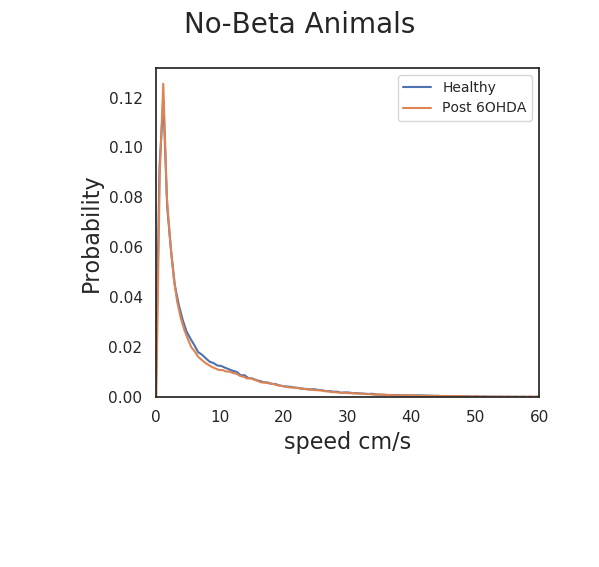

<IPython.core.display.Javascript object>


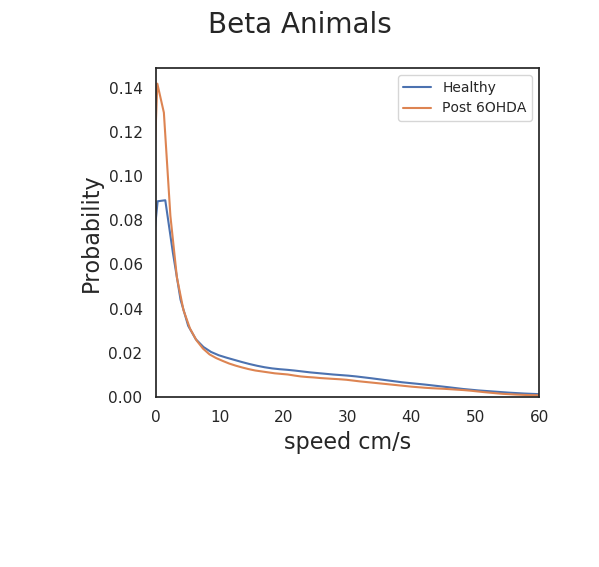

cleaning up speed data
cleaning up speed data


/home/dana_z/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [15]:
sns.set(color_codes=True)
sns.set_style("white")
fig, ax = plt.subplots(1,1,figsize=(5.99,5.67),gridspec_kw = {'hspace':.1,'bottom':0.3,'left':.26})
fig2, ax2 = plt.subplots(1,1,figsize=(5.99,5.67),gridspec_kw = {'hspace':.1,'bottom':0.3,'left':.26})

dataH = getData(Files[0],['speed'],period ='Pre', day = lambda x: x==0)
dataP = getData(Files[0],['speed'],period ='Pre', day = lambda x: x>6)

nBspeedH = nBspeedP = BspeedH = BspeedP = np.empty((1,0))

for sess in dataH:
    if sess[:4] in betaMice:
        BspeedH = np.concatenate((BspeedH, dataH[sess]['speed']['speed']), axis=1)
    else:
        nBspeedH = np.concatenate((nBspeedH, dataH[sess]['speed']['speed']), axis=1)
for sess in dataP:
    if sess[:4] in betaMice:
        BspeedP = np.concatenate((BspeedP, dataP[sess]['speed']['speed']), axis=1)
    else:
        nBspeedP = np.concatenate((nBspeedP, dataP[sess]['speed']['speed']), axis=1)

sns.distplot(nBspeedH,hist=False,ax=ax,label='Healthy')    
sns.distplot(nBspeedP,hist=False,ax=ax,label='Post 6OHDA') 
sns.distplot(BspeedH,hist=False,ax=ax2,label='Healthy')    
sns.distplot(BspeedP,hist=False,ax=ax2,label='Post 6OHDA') 

ax.set_xlim(0,60)
ax.set_xlabel('speed cm/s',fontsize=16)
ax.set_ylabel('Probability',fontsize=16)
ax.legend(fontsize=10)
ax2.set_xlim(0,60)
ax2.set_xlabel('speed cm/s',fontsize=16)
ax2.set_ylabel('Probability',fontsize=16)
ax2.legend(fontsize=10)
fig.suptitle('No-Beta Animals', fontsize=20)
fig2.suptitle('Beta Animals', fontsize=20)

fig.savefig('figs/labMeetingNov/nBeta_mvmt_dist.png',transparent=True,format='png')
fig2.savefig('figs/labMeetingNov/Beta_mvmt_dist.png',transparent=True,format='png')
#fig.savefig('figs/mvmt_dist.svg',transparent=True,format='svg')

<IPython.core.display.Javascript object>


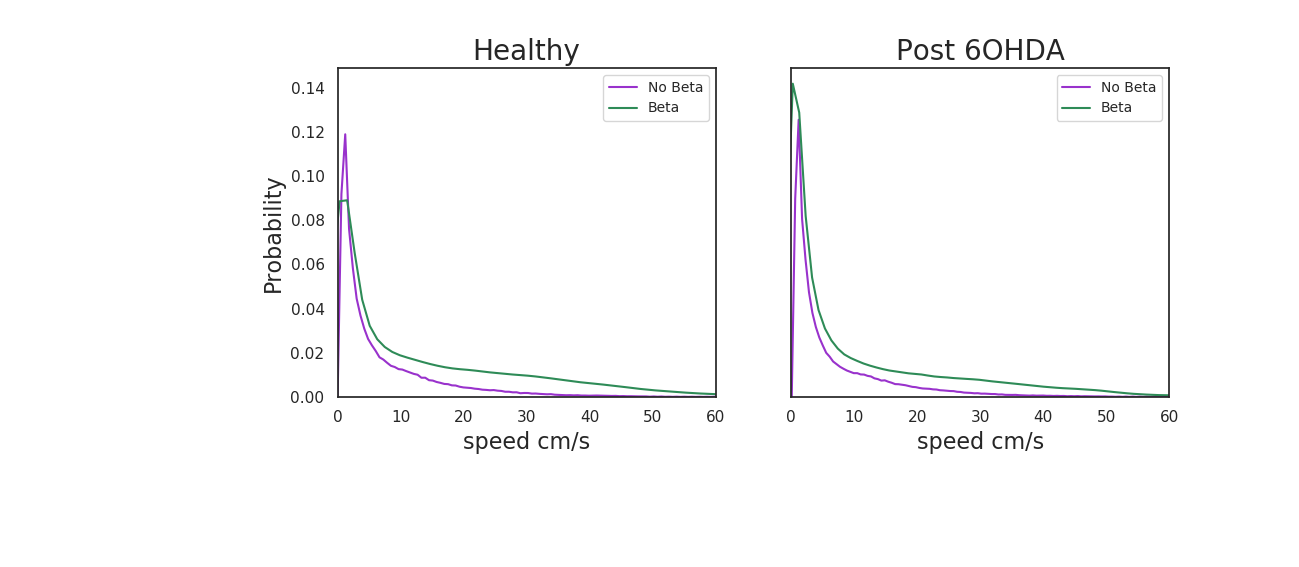

/home/dana_z/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [29]:
sns.set(color_codes=True)
sns.set_style("white")
fig, ax = plt.subplots(1,2,figsize=(12.99,5.67),sharey=True,gridspec_kw = {'hspace':.1,'bottom':0.3,'left':.26})

sns.distplot(nBspeedH,hist=False,ax=ax[0],label='No Beta',color ="darkorchid")    
sns.distplot(nBspeedP,hist=False,ax=ax[1],label='No Beta',color ="darkorchid") 
sns.distplot(BspeedH,hist=False,ax=ax[0],label='Beta',color ="seagreen")    
sns.distplot(BspeedP,hist=False,ax=ax[1],label='Beta',color ="seagreen") 

ax[0].set_xlim(0,60)
ax[1].set_xlim(0,60)
ax[0].set_xlabel('speed cm/s',fontsize=16)
ax[1].set_xlabel('speed cm/s',fontsize=16)
ax[0].set_ylabel('Probability',fontsize=16)
ax[0].legend(fontsize=10)
ax[1].legend(fontsize=10)
ax[0].set_title('Healthy', fontsize=20)
ax[1].set_title('Post 6OHDA', fontsize=20)

fig.savefig('figs/labMeetingNov/mvmt_dist_BetaComp.png',transparent=True,format='png')
#fig2.savefig('figs/labMeetingNov/Beta_mvmt_dist.png',transparent=True,format='png')
#fig.savefig('figs/mvmt_dist.svg',transparent=True,format='svg')

<h1> LFP figure </h1>

In [ ]:
# spectrom in high/low mvmt
f = h5py.File('Spectograms.hdf5','r')

# global presentation params and color params:
prs = Presentation()
prs.slide_width = Inches(11)
title_layout = prs.slide_layouts[5] 
title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)
slide.shapes.title.text = 'LFP spectrom in hi/low mvmt'

lf = {'left':0.30, 'top':1.30, 'height':5.80, 'width':10.10}
fArgs = {'left':Inches(lf['left']),'top':Inches(lf['top']), 'height':Inches(lf['height']), 'width':Inches(lf['width'])}

Colors = CP('highLowSpeed')

# fig2, ax2 = plt.subplots(2,1,figsize=(lf['width'],lf['height']))
miceList = getMiceList(Files[0])
for m in tqdm(miceList):
    fig, ax = plt.subplots(1,1,figsize=(lf['width'],lf['height']))
    
    data =  getData(Files[0],['lfp','speed'],period ='Pre', mice=m,day = lambda x: x==0)
    
    for sess in data:
        # get data
        dtS = 1/data[sess]['speed']['Fs']
        dtL = 1/data[sess]['lfp']['FS']
        ts = np.arange(0, np.max(data[sess]['speed']['speed'].shape)) * dtS 
        tl = np.arange(0, np.max(data[sess]['lfp']['lfp'].shape)) * dtL
        
        
        
        HpStart = getOnsetOrPeriod(m,sess,'Pre','HighMvmtPeriods_StartSegments')
        HpEnd = getOnsetOrPeriod(m,sess,'Pre','HighMvmtPeriods_EndSegments')

        LpStart = getOnsetOrPeriod(m,sess,'Pre','LowMvmtPeriods_StartSegments')
        LpEnd = getOnsetOrPeriod(m,sess,'Pre','LowMvmtPeriods_EndSegments')
        
        Himvmt = np.full_like(tl,False)
        Lomvmt = np.full_like(tl,False)
        
        for segI, seg in enumerate(HpStart):
            si = np.argmin(np.abs(tl-ts[seg]))
            se = np.argmin(np.abs(tl-ts[HpEnd[segI]]))
            Himvmt[si:se] = True
        for segI, seg in enumerate(LpStart):
            si = np.argmin(np.abs(tl-ts[seg]))
            se = np.argmin(np.abs(tl-ts[LpEnd[segI]]))
            Lomvmt[si:se] = True
        
        
        del HpStart,LpStart,HpEnd,LpEnd
    
        freq = f[m]['freq'].value
        coeff = np.abs(f[m][sess]['Pre']['coeff'].value)
        
#         totP = np.sum(coeff,axis=0)
        
        coeff = coeff #/totP
#        coeff = coeff
        
        lfpOutliers = removeLFPOutliers(data[sess]['lfp']['lfp'], sess)
        coeff[:,(lfpOutliers[:,0]==1)] = np.nan
        coeff = coeff.T
        
        
#         ax2[0].plot(freq,np.nanmean((coeff[(Lomvmt ==1),:]/np.nanmean(totP[(Lomvmt ==1)])),axis=0),color = Colors['low'] )
#         ax2[0].plot(freq,np.nanmean((coeff[(Himvmt ==1),:])/np.nanmean(totP[(Himvmt ==1)]),axis=0),color = Colors['high'])
#         ax2[1].plot(totP)
        
#         slide = prs2.slides.add_slide(title_layout)
#         slide.shapes.title.text = sess 
#         pic = plt2pptx(slide, fig2, **fArgs)
#         fig2.clf()
        
        sessH = (coeff[(Himvmt ==1),:])
        sessL = (coeff[(Lomvmt ==1),:])
        Hs = np.sum(sessH, axis=1)
        Ls = np.sum(sessL, axis=1)
        Hs2 = sessH.T/Hs.T
        sessH = np.nanmean(Hs2.T,axis=0, keepdims=True)

        Ls2 = sessL.T/Ls.T
        sessL = np.nanmean(Ls2.T,axis=0, keepdims=True)
        
        if 'LowCoeff' in locals():
            LowCoeff = np.concatenate((LowCoeff,sessL))
        else:
            LowCoeff = sessL

        if 'HiCoeff' in locals():
            HiCoeff = np.concatenate((HiCoeff,sessH))
        else:
            HiCoeff = sessH
                                                     
#    freq = f[m][sess]['Pre']['freq'].value

    
    

    ax.plot(freq,np.nanmean(HiCoeff, axis=0),color = Colors['high'] )
    ax.plot(freq,np.nanmean(LowCoeff, axis=0),color = Colors['low'] )

    
    if 'HHc2' in locals():
        HHc2 = np.concatenate((HHc2,HiCoeff), axis = 0)
    else:
        HHc2 = HiCoeff

    del HiCoeff

    if 'HLc2' in locals():
        HLc2 = np.concatenate((HLc2,LowCoeff), axis = 0)
    else:
        HLc2 = LowCoeff

    del LowCoeff

    
    
    slide = prs.slides.add_slide(title_layout)
    slide.shapes.title.text = m
    pic = plt2pptx(slide, fig, **fArgs)
    fig.clf()
    plt.close(fig)

fig, ax = plt.subplots(1,1,figsize=(lf['width'],lf['height']))
ax.plot(freq,np.nanmean(HHc2,axis=0),color = Colors['high'] )
ax.plot(freq,np.nanmean(HLc2,axis=0),color = Colors['low'] )
                                                     
                                                     
slide = prs.slides.add_slide(title_layout)
slide.shapes.title.text = 'all Mice' 
pic = plt2pptx(slide, fig, **fArgs)
fig.clf()
plt.close(fig)
    

        
prs.save('ppts/PSD_hiLo_mice2.pptx')


In [ ]:
hC = np.nanmean(HHc2.T,axis=1)
hS2 = np.nanstd(HHc2.T,axis=1)
print(hC[0:2], hC.shape, np.sum(HHc2[13,:]))
lC = np.nanmean(HLc2.T,axis=1)
lS2 = np.nanstd(HLc2.T,axis=1)
print(lC[0:2], lC.shape, np.sum(HLc2[15,:]))

In [ ]:
lS=lS2/np.sqrt(48)
hS=hS2/np.sqrt(48)
#hC2 = hC
#lC2 = lC
hC= hC2
lC= lC2
fig, ax = plt.subplots(1,1,figsize=(11.13,7.15))
ax.plot(freq,hC,color = Colors['high'], label='High Speed',linewidth=3.0)
#ax.plot(freq,hC,color = 'lightgreen', label='High Speed')
ax.fill_between(freq, hC-hS, hC+hS,color=Colors['high'],alpha=0.3)
ax.plot(freq,lC,color = Colors['low'], label='Low Speed',linewidth=3.0)
ax.fill_between(freq, lC-lS, lC+lS,color=Colors['low'],alpha=0.2)
#ax.set_xlim(6,40)
ax.set_xlim(9,15)
ax.set_ylim(0.015,0.03)
ax.set_ylabel('PSD',fontsize=16)
#ax.axes.get_yaxis().set_ticks([])
ax.set_xlabel('Frequency (Hz)',fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(fontsize=16)

fig.savefig('figs/ZoomBeta_in_highLow',transparent=True,format='png')
fig.savefig('figs/ZoomBeta_in_highLow_il',transparent=True,format='eps')

In [ ]:
from matplotlib.ticker import FormatStrFormatter
lS=lS2/np.sqrt(48)
hS=hS2/np.sqrt(48)
#hC2 = hC
#lC2 = lC
hC= hC2
lC= lC2
fig, ax = plt.subplots(1,1,figsize=(3.27,2.57))

ax.plot(freq,hC,color = Colors['high'], label='High Speed',linewidth=3.0)
#ax.plot(freq,hC,color = 'lightgreen', label='High Speed')
ax.fill_between(freq, hC-hS, hC+hS,color=Colors['high'],alpha=0.3)
ax.plot(freq,lC,color = Colors['low'], label='Low Speed',linewidth=3.0)
ax.fill_between(freq, lC-lS, lC+lS,color=Colors['low'],alpha=0.2)
#ax.set_xlim(6,40)
ax.set_xlim(9,15)
ax.set_ylim(0.018,0.028)
ax.set_ylabel('PSD',fontsize=10)

#ax.axes.get_yaxis().set_ticks([])
ax.set_yticklabels(ax.axes.get_yticks(),fontsize=6)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1E'))
#ax.yaxis.get_major_formatter.set_useMathText(True)
ax.set_xlabel('Frequency (Hz)',fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.legend(fontsize=16)

fig.savefig('figs/ZoomBeta_in_highLow',transparent=True,format='png')
fig.savefig('figs/ZoomBeta_in_highLow_il',transparent=True,format='eps')

<IPython.core.display.Javascript object>


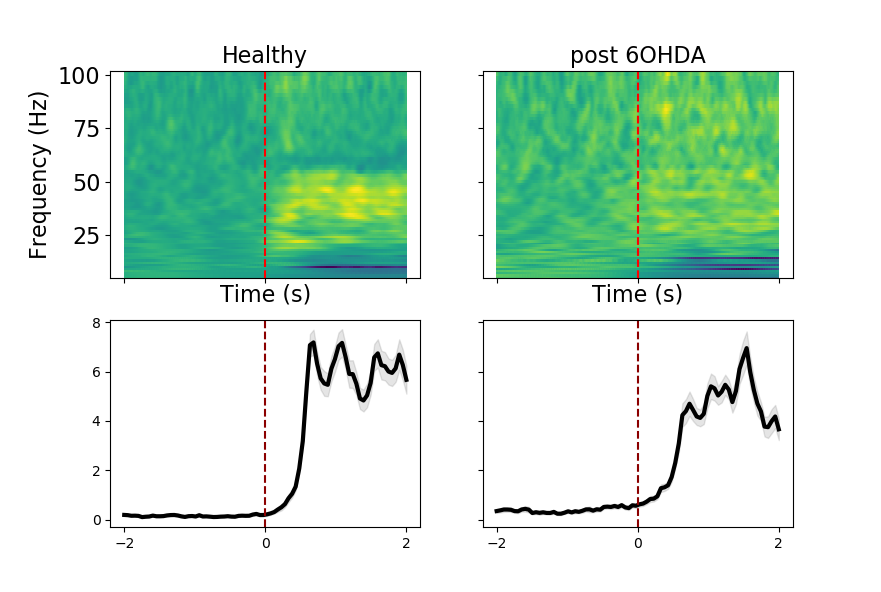

cleaning up lfp data
cleaning up speed data


/home/dana_z/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'numpy.ndarray'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app
/home/dana_z/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'numpy.ndarray'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


found  0.0  outlier points
found  0.0  outlier points
(12206, 87, 6) (12206, 87, 29)
found  0.0  outlier points
(12206, 87, 35) (12206, 87, 39)
cleaning up lfp data
cleaning up speed data


/home/dana_z/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:90: DeprecationWarning: object of type <class 'numpy.ndarray'> cannot be safely interpreted as an integer.


found  0.0  outlier points
found  0.0  outlier points
found  0.0  outlier points
found  0.0  outlier points
found  0.0  outlier points
found  0.0  outlier points
found  0.0  outlier points
found  0.0  outlier points
found  0.0  outlier points
found  0.0  outlier points


In [4]:
# align spectogram to mvmt onset -> for each mouse and in total:
f = h5py.File('Spectograms.hdf5','r')
m = '8803'

fig, ax = plt.subplots(2,2,figsize=(8.81,5.92),sharex='col',sharey='row')  
data =  getData(Files[0],['lfp','speed'],period ='Pre', mice=m,day = lambda x: x==0)

for sess in data:
    # get data
    dtS = 1/data[sess]['speed']['Fs']
    dtL = 1/data[sess]['lfp']['FS']
    ts = np.arange(0, np.max(data[sess]['speed']['speed'].shape)) * dtS 
    tl = np.arange(0, np.max(data[sess]['lfp']['lfp'].shape)) * dtL

    tPlot = np.linspace(-2,2,4/dtL)
    tPlotS = np.linspace(-2,2,4/dtS)

    mvmtOnset = getOnsetOrPeriod(m,sess,'Pre','mvmtOnset')
    mvmtOnsetL = np.full_like(tl,False)
    for si in ts[mvmtOnset]:
        ti = np.argmin(np.abs(tl-si))
        mvmtOnsetL[ti] = True

        

#        del mvmtOnset

#        freq = f[m]['freq'].value
    coeff = np.abs(f[m][sess]['Pre']['coeff'].value)

    #        totP = np.sum(coeff,axis=1)
    #        coeff = coeff.T/totP.T
    #        coeff = coeff.T

    lfpOutliers = removeLFPOutliers(data[sess]['lfp']['lfp'], sess)
    coeff[:,(lfpOutliers[:,0]==1)] = np.nan
    coeff = coeff.T#*freq

    al = alignToOnset(coeff,(mvmtOnsetL==1), winPost =2/dtL, winPre = 2/dtL)

    if al.ndim <3:
        continue

    if 'aligned' in locals():
        print(aligned.shape,al.shape)
        aligned = np.concatenate((aligned,al), axis = 2)
    else:
        aligned = al

    alS = alignToOnset(data[sess]['speed']['speed'].T,(mvmtOnset==1), winPost =2/dtS, winPre = 2/dtS)

    if alS.ndim <2:
        continue

    if 'alignedS' in locals():
        alignedS = np.concatenate((alignedS,alS), axis = 1)
    else:
        alignedS = alS

freq = f[m]['freq'].value
d = np.nanmean(aligned,axis=2)
mu = np.nanmean(d[:int(d.shape[0]/2),:],axis=0)
s = np.nanstd(d[:int(d.shape[0]/2),:],axis=0)
d = (d-mu)/s

im = ax[0,0].pcolormesh(tPlot,freq,d.transpose())
#    cbar=plt.colorbar(im,ax=ax[0,0])
#    cbar.set_label(label='Power',size=16)
ax[0,0].axvline(x=0.0,color='red',linestyle='dashed')
ax[0,0].set_title('Healthy',fontsize=16)
ax[0,0].set_ylabel('Frequency (Hz)',fontsize=16)
ax[0,0].set_xlabel('Time (s)',fontsize=16)
ax[0,0].tick_params(axis = 'y',labelsize=16)
ax[0,0].tick_params(axis = 'x',labelsize=16)

PlotRelativeToOnset(ax[1,0],alignedS,tPlotS,Color='black',Label='speed',mesErr=True)

Hspec = aligned
Hspeed = alignedS
del aligned,alignedS
data =  getData(Files[0],['lfp','speed'],period ='Pre', mice=m,day = lambda x: x>3)

for sess in data:
    # get data
    dtS = 1/data[sess]['speed']['Fs']
    dtL = 1/data[sess]['lfp']['FS']
    ts = np.arange(0, np.max(data[sess]['speed']['speed'].shape)) * dtS 
    tl = np.arange(0, np.max(data[sess]['lfp']['lfp'].shape)) * dtL

    tPlot = np.linspace(-2,2,4/dtL)

    mvmtOnset = getOnsetOrPeriod(m,sess,'Pre','mvmtOnset')
    mvmtOnsetL = np.full_like(tl,False)
    for si in ts[mvmtOnset]:
        ti = np.argmin(np.abs(tl-si))
        mvmtOnsetL[ti] = True
    #        del mvmtOnset

    #        freq = f[m][sess]['Pre']['freq'].value
    coeff = np.abs(f[m][sess]['Pre']['coeff'].value)

    #        totP = np.sum(coeff,axis=1)
    #        coeff = coeff.T/totP.T
    #        coeff = coeff.T

    lfpOutliers = removeLFPOutliers(data[sess]['lfp']['lfp'], sess)
    coeff[:,(lfpOutliers[:,0]==1)] = np.nan

    coeff = coeff.T#*freq
    al = alignToOnset(coeff,(mvmtOnsetL==1), winPost =2/dtL, winPre = 2/dtL)

    if al.ndim <3:
        continue

    if 'aligned' in locals():
        aligned = np.concatenate((aligned,al), axis = 2)
    else:
        aligned = al

    alS = alignToOnset(data[sess]['speed']['speed'].T,(mvmtOnset==1), winPost =2/dtS, winPre = 2/dtS)

    if alS.ndim <2:
        continue

    if 'alignedS' in locals():
        alignedS = np.concatenate((alignedS,alS), axis = 1)
    else:
        alignedS = alS

if 'aligned' in locals():
    d = np.nanmean(aligned,axis=2)
    mu = np.nanmean(d[:int(d.shape[0]/2),:],axis=0)
    s = np.nanstd(d[:int(d.shape[0]/2),:],axis=0)
    d = (d-mu)/s

    im = ax[0,1].pcolormesh(tPlot,freq,d.transpose())
    #        cbar=plt.colorbar(im,ax=ax[0,1])
    #        cbar.set_label(label='Power',size=16)
    ax[0,1].axvline(x=0.0,color='red',linestyle='dashed')
    ax[0,1].set_title('post 6OHDA',fontsize=16)
    #        ax[0,1].set_ylabel('Frequency (Hz)',fontsize=16)
    ax[0,1].set_xlabel('Time (s)',fontsize=16)
    ax[0,1].tick_params(axis = 'y',labelsize=16)
    ax[0,1].tick_params(axis = 'x',labelsize=16)

    PlotRelativeToOnset(ax[1,1],alignedS,tPlotS,Color='black',Label='speed',mesErr=True)


<IPython.core.display.Javascript object>


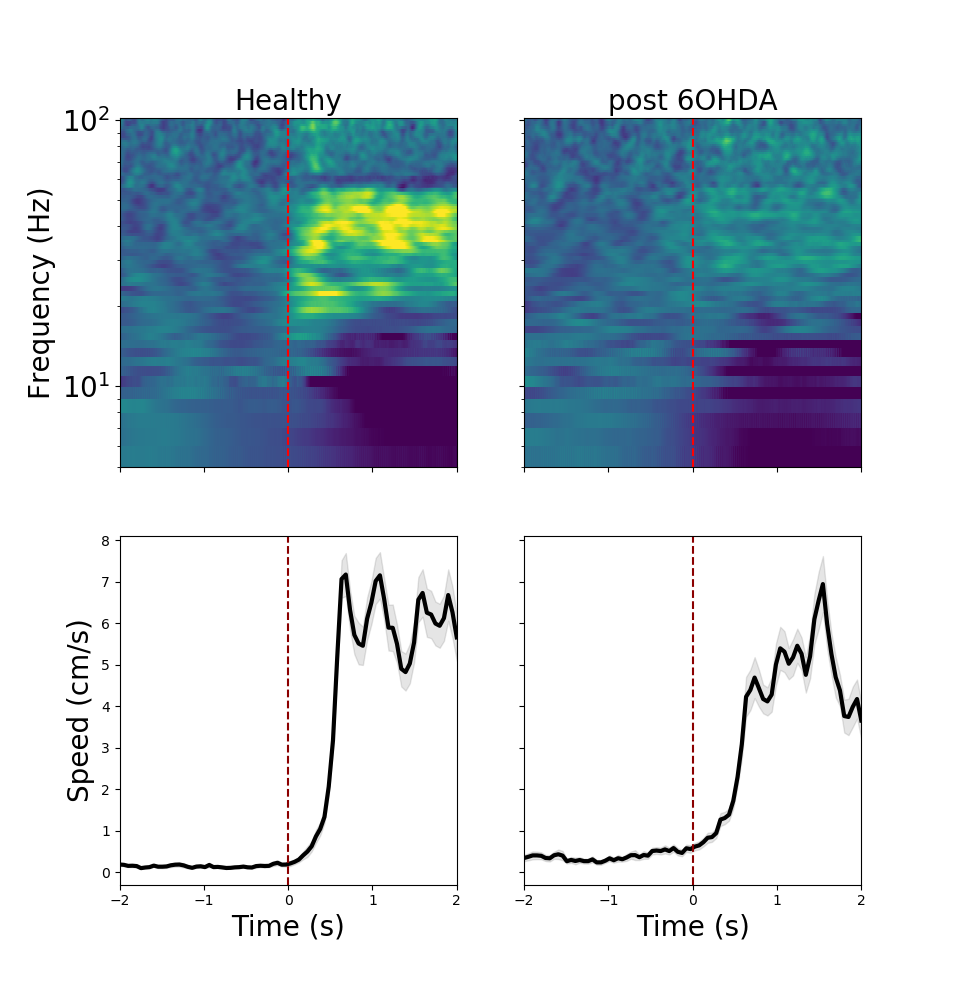

In [5]:
#sns.set(color_codes=False)
fig, ax = plt.subplots(2,2,figsize=(9.57,9.95),sharex='col',sharey='row')  
freq = f[m]['freq'].value
d = np.nanmean(Hspec,axis=2)
mu = np.nanmean(d[:int(d.shape[0]/2),:],axis=0)
s = np.nanstd(d[:int(d.shape[0]/2),:],axis=0)
d = (d-mu)/s

im = ax[0,0].pcolormesh(tPlot,freq,d.transpose(),vmin=-5,vmax=10)
#cbar=plt.colorbar(im,ax=ax[0,2])
#cbar.set_label(label='Power',size=20)
ax[0,0].axvline(x=0.0,color='red',linestyle='dashed')
ax[0,0].set_title('Healthy',fontsize=20)
ax[0,0].set_ylabel('Frequency (Hz)',fontsize=20)
ax[1,0].set_xlabel('Time (s)',fontsize=20)
ax[0,0].tick_params(axis = 'y',labelsize=20)
ax[0,0].tick_params(axis = 'x',labelsize=20)

PlotRelativeToOnset(ax[1,0],Hspeed,tPlotS,Color='black',Label='speed',mesErr=True)

d = np.nanmean(aligned,axis=2)
mu = np.nanmean(d[:int(d.shape[0]/2),:],axis=0)
s = np.nanstd(d[:int(d.shape[0]/2),:],axis=0)
d = (d-mu)/s
im = ax[0,1].pcolormesh(tPlot,freq,d.transpose(),vmin=-5,vmax=10)
#cbar=plt.colorbar(im,ax=ax[1,2])
#cbar.set_label(label='Power',size=20)
ax[0,1].axvline(x=0.0,color='red',linestyle='dashed')
ax[0,1].set_title('post 6OHDA',fontsize=20)
#        ax[0,1].set_ylabel('Frequency (Hz)',fontsize=20)
ax[1,1].set_xlabel('Time (s)',fontsize=20)
ax[0,1].tick_params(axis = 'y',labelsize=20)
ax[0,1].tick_params(axis = 'x',labelsize=20)

PlotRelativeToOnset(ax[1,1],alignedS,tPlotS,Color='black',Label='speed',mesErr=True)
ax[0,0].set_xlim(-2,2)
ax[0,1].set_xlim(-2,2)
ax[1,0].set_ylabel('Speed (cm/s)',fontsize=20)
#ax[0,0].set_ylim(6,50)
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')

fig.savefig('figs/labMeetingNov/neuralActivity_ex2_8803.png',transparent=True,format='png')
#fig.savefig('figs/neuralActivity_zScore.svg',transparent=True,format='svg')

In [ ]:
baselines = getData(Files[0],['lfp'],period ='Pre',mice = ['7909','7584','1222','4539'],day = lambda x: int(x)==0)
early = getData(Files[0],['lfp'],period ='Pre',mice = ['7909','7584','1222','4539'],day = lambda x: (int(x)<= 4) & (x>0))
mid = getData(Files[0],['lfp'],period ='Pre',mice = ['7909','7584','1222','4539'],day = lambda x: (int(x)> 5) & (x<=8))
late = getData(Files[0],['lfp'],period ='Pre',mice = ['7909','7584','1222','4539'],day = lambda x: (int(x)> 9) & (x<=14))
Superlate = getData(Files[0],['lfp'],period ='Pre',mice = ['7909','7584','1222','4539'],day = lambda x: (int(x)> 14) )

In [ ]:
#del saveData
fig, ax = plt.subplots(1,1,figsize=(8.32,6.15),sharex='col',sharey='row')  
saveData_n8430= {}
f = h5py.File('Spectograms.hdf5','r')
cond = ['baselines','early','mid','late','Superlate']
Names = {'baselines':'Pre 6OHDA','early':'days 1-4','mid':'days 6-8' ,'late':'days 10-14','Superlate':'days 15-35'}
Colors = {'baselines':'steelblue','early':'darkorange','mid':'red' ,'late':'black','Superlate':'green'}


freq = f['0761']['freq']
for c in cond:
    data = eval(c)
    spec = np.empty((87,1))
    for sess in data:
        m = sess[0:4]
        coeff = np.abs(f[m][sess]['Pre']['coeff'].value)
        lfpOutliers = removeLFPOutliers(data[sess]['lfp']['lfp'], sess)
        coeff[:,(lfpOutliers[:,0]==1)] = np.nan
        spec = np.concatenate((spec,np.nanmean(coeff,axis=1,keepdims=True)),axis=1)
    spec = spec/np.nansum(spec,axis=0)
    M = np.nanmean(spec,axis=1)
    Std = np.nanstd(spec,axis=1)/np.sqrt(len(data.keys()))
    saveData_n8430[c] = {'M':M,'Std':Std}

    ax.plot(freq, M, linewidth=3,color=Colors[c],label=Names[c])
    ax.fill_between(freq, M-Std, M+Std,color=Colors[c],alpha=0.1)
ax.set_ylabel('PSD',fontsize=12)
ax.set_xlabel('Frequency',fontsize=12)
ax.legend(fontsize=12)
#ax.xlim((8,30))

In [ ]:
cond = ['baselines','early','mid','late']#,'Superlate']

fig, ax = plt.subplots(1,1,figsize=(8.32,6.15),sharex='col',sharey='row')  
for c in cond:
    M = saveData_n8430[c]['M']
    Std = saveData_n8430[c]['Std']
    ax.plot(freq, M, linewidth=3,color=Colors[c],label=Names[c])
    ax.fill_between(freq, M-Std, M+Std,color=Colors[c],alpha=0.1)
ax.set_ylabel('PSD',fontsize=20)
ax.set_xlabel('Frequency',fontsize=20)
ax.legend(fontsize=20)  
ax.set_xlim(7,40)
ax.set_ylim(0,0.06)
fig.savefig('figs/BetaIncrease.png',transparent=True,format='png')
fig.savefig('figs/BetaIncrease.svg',transparent=True,format='svg')